In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 10

import sys
import os
import src.optimal_shading as optimal_shading
import src.auction as auction 
from scipy.stats import genpareto, uniform
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np 
import plotly
import plotly.graph_objs as go
import itertools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Only one strategic bidder

#### Second price auction

truthful with reserve price: 3 bidders
fullfiled
fullfiled
truthful without reserve price: 3 bidders
truthful thresholded stragegy:3 bidders
fullfiled
fullfiled
improved thresholded stragegy:3 bidders
fullfiled
fullfiled
truthful with reserve price: 4 bidders
fullfiled
fullfiled
fullfiled
truthful without reserve price: 4 bidders
truthful thresholded stragegy:4 bidders
fullfiled
fullfiled
fullfiled
improved thresholded stragegy:4 bidders
fullfiled
fullfiled
fullfiled
truthful with reserve price: 5 bidders
fullfiled
fullfiled
fullfiled
fullfiled
truthful without reserve price: 5 bidders
truthful thresholded stragegy:5 bidders
fullfiled
fullfiled
fullfiled
fullfiled
improved thresholded stragegy:5 bidders
fullfiled
fullfiled
fullfiled
fullfiled
truthful with reserve price: 6 bidders
fullfiled
fullfiled
fullfiled
fullfiled
fullfiled
truthful without reserve price: 6 bidders
truthful thresholded stragegy:6 bidders
fullfiled
fullfiled
fullfiled
fullfiled
fullfiled
improved thresholded strag

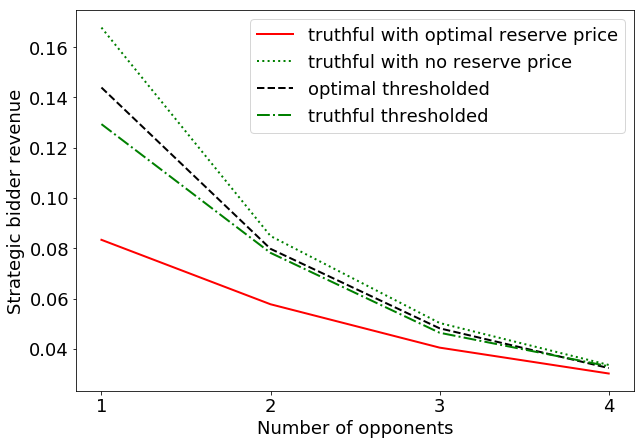

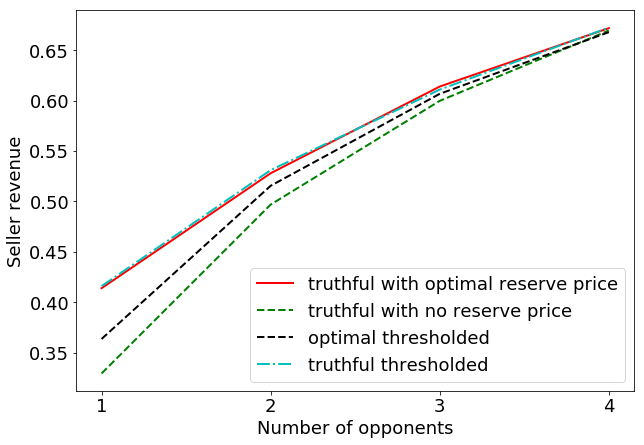

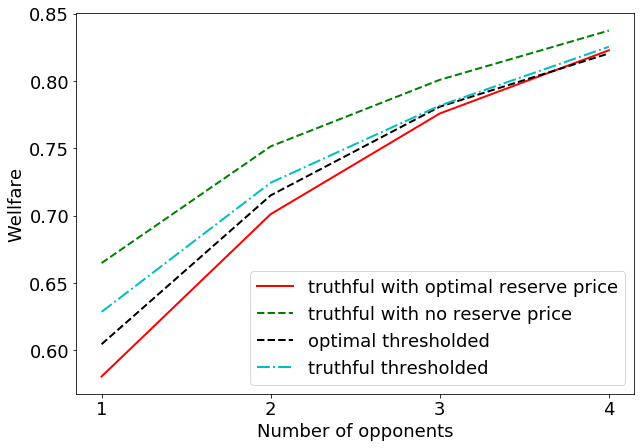

In [4]:
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 18   
def compare_setting_one_strategic(list_K,dist,nb_runs):
    
    params_optimal_seuille = {2:0.7968,3:0.7153,4:0.6667,5:0.634}
    
    profit_bidders_optimal_affine = []
    profit_bidders_optimal_linear = []
    profit_bidders_truthful = []
    profit_bidders_no_second_price = []
    profit_bidders_seuille = []
    profit_bidders_seuille_truthful = []
    profit_bidders_seuille_optimal = []
    profit_bidders_affine_seuille = []
    profit_bidders_optimized_seuille = []
    
    profit_seller_optimal_affine = []
    profit_seller_optimal_linear = []
    profit_seller_truthful = []
    profit_seller_no_second_price = []
    profit_seller_seuille = []
    profit_seller_seuille_truthful = []
    profit_seller_seuille_optimal = []
    profit_seller_affine_seuille = []
    profit_seller_optimized_seuille = []
    
    wellfare_optimal_affine = []
    wellfare_optimal_linear = []
    wellfare_truthful = []
    wellfare_no_second_price = []
    wellfare_seuille = []
    wellfare_seuille_truthful = []
    wellfare_seuille_optimal = []
    wellfare_affine_seuille = []
    wellfare_optimized_seuille = []
      
    for K in list_K:
        K = K + 1
        #bidding truthful with reserve price
        print(f"truthful with reserve price: {K} bidders")
        list_shading_bidders = [[1.0,0.0] for i in range(K)]
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt(list_shading_bidders, dist, nb_runs)
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_truthful.append(np.sum(exp_bidders_revenue)/K)
        profit_seller_truthful.append(exp_seller_revenue)
        wellfare_truthful.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
        #bidding truthful with no reserve price
        print(f"truthful without reserve price: {K} bidders")
        list_shading_bidders = [[1.0,0.0] for i in range(K)]
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt(list_shading_bidders, dist, nb_runs, reserve_price_strategy="no_reserve_price")
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_no_second_price.append(np.sum(exp_bidders_revenue)/K)
        profit_seller_no_second_price.append(exp_seller_revenue)
        wellfare_no_second_price.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
     
        #bidding with improved seuillage
        print(f"truthful thresholded stragegy:{K} bidders")
        bidder_strategic = [[1,0]]
        list_shading_bidders_non_strategic = [[1,0.0] for i in range(K-1)]
        list_shading_bidders = bidder_strategic + list_shading_bidders_non_strategic        
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt_seuille(list_shading_bidders, dist, nb_runs,seuille = params_optimal_seuille[K])
        #print(f"reserve price : {reserve_price}")
        #print(exp_bidders_revenue)
        profit_bidders_optimized_seuille.append(exp_bidders_revenue[0])
        profit_seller_optimized_seuille.append(exp_seller_revenue)
        wellfare_optimized_seuille.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
        #bidding with truthful seuillage
        print(f"improved thresholded stragegy:{K} bidders")
        bidder_strategic = [[1,0]]
        list_shading_bidders_non_strategic = [[1,0.0] for i in range(K-1)]
        list_shading_bidders = bidder_strategic + list_shading_bidders_non_strategic        
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt_seuille(list_shading_bidders, dist, nb_runs, seuille=0.5)
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_seuille_truthful.append(exp_bidders_revenue[0])
        profit_seller_seuille_truthful.append(exp_seller_revenue)
        wellfare_seuille_truthful.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
              
    f, ax = plt.subplots()
    plot1, = plt.plot(list_K,profit_bidders_truthful,'r-', lw=2, label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,profit_bidders_no_second_price,'g:', lw=2, label="truthful with no reserve price")
    plot5, = plt.plot(list_K,profit_bidders_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,profit_bidders_seuille_truthful,'g-.',lw=2,label="truthful thresholded")
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Revenue of bidders at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    plt.xlabel("Number of opponents")
    plt.ylabel("Strategic bidder revenue")
    plt.show()
    
    f, ax = plt.subplots()

    plot1, = plt.plot(list_K,profit_seller_truthful,'r-', lw=2,label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,profit_seller_no_second_price,'g--', lw=2,label="truthful with no reserve price")
    plot5, = plt.plot(list_K,profit_seller_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,profit_seller_seuille_truthful,'c-.',lw=2,label="truthful thresholded")
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Revenue of the seller at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel("Number of opponents")
    plt.ylabel("Seller revenue")
    plt.show()
    
    f, ax = plt.subplots()

    plot1, = plt.plot(list_K,wellfare_truthful,'r-', lw=2,label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,wellfare_no_second_price,'g--', lw=2,label="truthful with no reserve price")
    plot5, = plt.plot(list_K,wellfare_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,wellfare_seuille_truthful,'c-.',lw=2,label="truthful thresholded")
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Wellfare at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel("Number of opponents")
    plt.ylabel("Wellfare")
    plt.show()
        
        
plt.rcParams['figure.figsize'] = (10.0, 7.0)    
uni_dist = uniform() 
#list_K = [1]
list_K = [1,2,3,4]
compare_setting_one_strategic(list_K,uni_dist,10000)


## Optimal strategies in the case of 2 players (one strategic)

beta(x) = a*x+b
a:0.7, b:0
x_opt:0.5
vrt_val_xopt:0.0
beta(x) = a*x+b
a:0.4327677108793556, b:0.18276771087935936
x_opt:0.28883855439678324
vrt_val_xopt:-0.42232289120643346


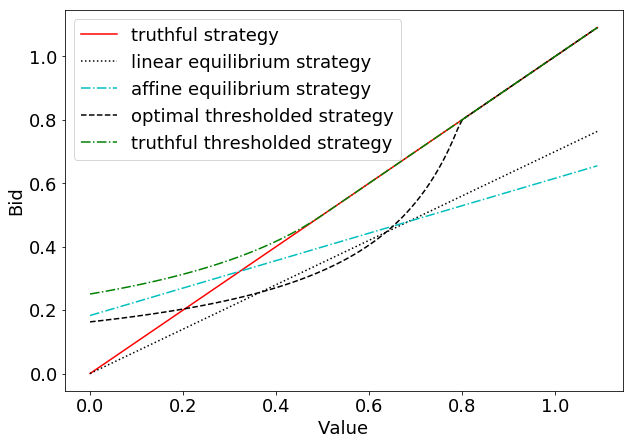

In [12]:
x = np.arange(0,1.1,0.01)
uni_dist = uniform() 
handle = []
    
bidder_strategic = [1,0]
plot, = plt.plot(x,x,'r-',label ="truthful strategy")
handle.append(plot)

a,b = optimal_shading.compute_optimal_shading(2, uni_dist.cdf, uni_dist.pdf, 'linear', "one_strategic", uni_dist.ppf(0), uni_dist.ppf(1))
bidder_strategic = [a,b]
bidder = auction.Bidder(uni_dist, bidder_strategic)
bid_function = [bidder.formula_bid(y) for y in x]
plot, = plt.plot(x, bid_function, 'k:', label = "linear equilibrium strategy")
handle.append(plot)
a,b = optimal_shading.compute_optimal_shading(2, uni_dist.cdf, uni_dist.pdf, 'affine', "one_strategic", uni_dist.ppf(0), uni_dist.ppf(1))
bidder_strategic = [a,b]
bidder = auction.Bidder(uni_dist, bidder_strategic)
bid_function = [bidder.formula_bid(y) for y in x]
plot, = plt.plot(x, bid_function,'c-.', label = "affine equilibrium strategy")
handle.append(plot)
bidder_strategic = [1,0]
bidder_seuille = auction.Bidder_seuille(uni_dist,0.7968)
bid_function = [bidder_seuille.formula_bid(y) for y in x]
plot, = plt.plot(x, bid_function, 'k--', label = "optimal thresholded strategy")
handle.append(plot)

bidder_strategic = [1,0]
bidder_seuille = auction.Bidder_seuille(uni_dist,0.5)
bid_function = [bidder_seuille.formula_bid(y) for y in x]
plot, = plt.plot(x, bid_function, 'g-.', label = "truthful thresholded strategy")
handle.append(plot)
plt.rcParams['font.size'] = 18   


plt.xlabel("Value")
plt.ylabel("Bid")


plt.legend(handles=handle)
plt.show()


## All strategic setting

truthful with reserve price: 2 bidders
fullfiled
fullfiled
truthful without reserve price: 2 bidders
truthful thresholded stragegy:2 bidders
fullfiled
fullfiled
improved thresholded stragegy:2 bidders
fullfiled
fullfiled
truthful with reserve price: 3 bidders
fullfiled
fullfiled
fullfiled
truthful without reserve price: 3 bidders
truthful thresholded stragegy:3 bidders
fullfiled
fullfiled
fullfiled
improved thresholded stragegy:3 bidders
fullfiled
fullfiled
fullfiled
truthful with reserve price: 4 bidders
fullfiled
fullfiled
fullfiled
fullfiled
truthful without reserve price: 4 bidders
truthful thresholded stragegy:4 bidders
fullfiled
fullfiled
fullfiled
fullfiled
improved thresholded stragegy:4 bidders
fullfiled
fullfiled
fullfiled
fullfiled
truthful with reserve price: 5 bidders
fullfiled
fullfiled
fullfiled
fullfiled
fullfiled
truthful without reserve price: 5 bidders
truthful thresholded stragegy:5 bidders
fullfiled
fullfiled
fullfiled
fullfiled
fullfiled
improved thresholded strag

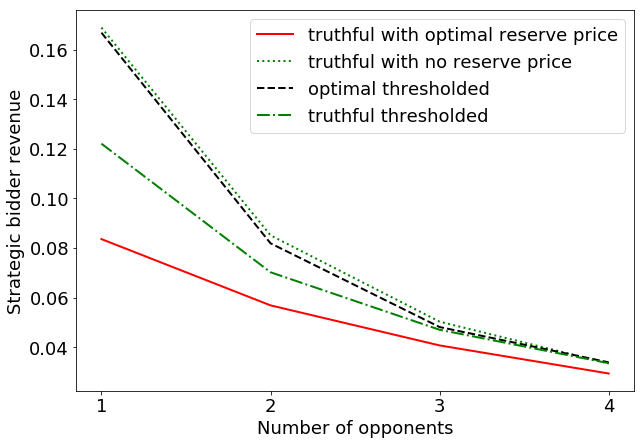

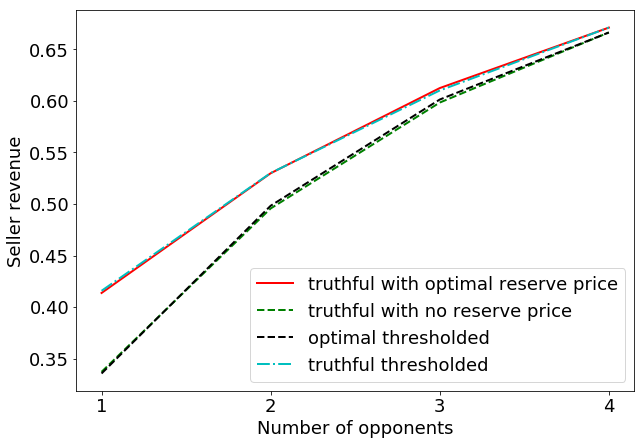

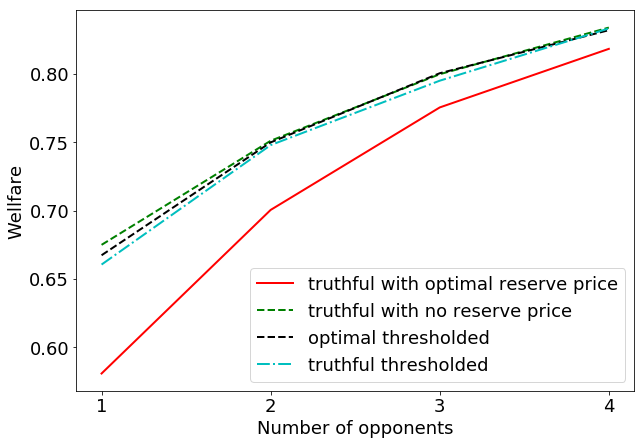

In [5]:
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 18   
def compare_setting_one_strategic(list_K,dist,nb_runs):
    
    params_optimal_seuille = {2:0.75,3:2/3,4:0.625,5:0.60}
    
    profit_bidders_optimal_affine = []
    profit_bidders_optimal_linear = []
    profit_bidders_truthful = []
    profit_bidders_no_second_price = []
    profit_bidders_seuille = []
    profit_bidders_seuille_truthful = []
    profit_bidders_seuille_optimal = []
    profit_bidders_affine_seuille = []
    profit_bidders_optimized_seuille = []
    
    profit_seller_optimal_affine = []
    profit_seller_optimal_linear = []
    profit_seller_truthful = []
    profit_seller_no_second_price = []
    profit_seller_seuille = []
    profit_seller_seuille_truthful = []
    profit_seller_seuille_optimal = []
    profit_seller_affine_seuille = []
    profit_seller_optimized_seuille = []
    
    wellfare_optimal_affine = []
    wellfare_optimal_linear = []
    wellfare_truthful = []
    wellfare_no_second_price = []
    wellfare_seuille = []
    wellfare_seuille_truthful = []
    wellfare_seuille_optimal = []
    wellfare_affine_seuille = []
    wellfare_optimized_seuille = []
      
    for K in list_K:
        K = K + 1
        #bidding truthful with reserve price
        print(f"truthful with reserve price: {K} bidders")
        list_shading_bidders = [[1.0,0.0] for i in range(K)]
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt(list_shading_bidders, dist, nb_runs)
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_truthful.append(np.sum(exp_bidders_revenue)/K)
        profit_seller_truthful.append(exp_seller_revenue)
        wellfare_truthful.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
        #bidding truthful with no reserve price
        print(f"truthful without reserve price: {K} bidders")
        list_shading_bidders = [[1.0,0.0] for i in range(K)]
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt(list_shading_bidders, dist, nb_runs, reserve_price_strategy="no_reserve_price")
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_no_second_price.append(np.sum(exp_bidders_revenue)/K)
        profit_seller_no_second_price.append(exp_seller_revenue)
        wellfare_no_second_price.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
     
        #bidding with improved seuillage
        print(f"truthful thresholded stragegy:{K} bidders")
        bidder_strategic = [[1,0]]
        list_shading_bidders_non_strategic = [[1,0.0] for i in range(K-1)]
        list_shading_bidders = bidder_strategic + list_shading_bidders_non_strategic        
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt_seuille_symmetric(list_shading_bidders, dist, nb_runs,seuille = params_optimal_seuille[K])
        #print(f"reserve price : {reserve_price}")
        #print(exp_bidders_revenue)
        profit_bidders_optimized_seuille.append(exp_bidders_revenue[0])
        profit_seller_optimized_seuille.append(exp_seller_revenue)
        wellfare_optimized_seuille.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
        #bidding with truthful seuillage
        print(f"improved thresholded stragegy:{K} bidders")
        bidder_strategic = [[1,0]]
        list_shading_bidders_non_strategic = [[1,0.0] for i in range(K-1)]
        list_shading_bidders = bidder_strategic + list_shading_bidders_non_strategic        
        #print(list_shading_bidders)
        exp_bidders_revenue, exp_seller_revenue, reserve_price = auction.experiment_ind_campgn_mgmt_seuille_symmetric(list_shading_bidders, dist, nb_runs, seuille=0.5)
        #print(f"reserve price : {reserve_price}")
        #print(f"bidders_revenue: {exp_bidders_revenue}")
        #print(f"welfare:{np.sum(exp_bidders_revenue) + exp_seller_revenue}")
        #print(f"seller_revenue:{exp_seller_revenue}")
        profit_bidders_seuille_truthful.append(exp_bidders_revenue[0])
        profit_seller_seuille_truthful.append(exp_seller_revenue)
        wellfare_seuille_truthful.append(np.sum(exp_bidders_revenue) + exp_seller_revenue)
        
              
    f, ax = plt.subplots()
    plot1, = plt.plot(list_K,profit_bidders_truthful,'r-', lw=2, label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,profit_bidders_no_second_price,'g:', lw=2, label="truthful with no reserve price")
    plot5, = plt.plot(list_K,profit_bidders_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,profit_bidders_seuille_truthful,'g-.',lw=2,label="truthful thresholded")
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Revenue of bidders at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    plt.xlabel("Number of opponents")
    plt.ylabel("Strategic bidder revenue")
    plt.show()
    
    f, ax = plt.subplots()

    plot1, = plt.plot(list_K,profit_seller_truthful,'r-', lw=2,label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,profit_seller_no_second_price,'g--', lw=2,label="truthful with no reserve price")
    plot5, = plt.plot(list_K,profit_seller_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,profit_seller_seuille_truthful,'c-.',lw=2,label="truthful thresholded")
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Revenue of the seller at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel("Number of opponents")
    plt.ylabel("Seller revenue")
    plt.show()
    
    f, ax = plt.subplots()

    plot1, = plt.plot(list_K,wellfare_truthful,'r-', lw=2,label="truthful with optimal reserve price")
    plot2, = plt.plot(list_K,wellfare_no_second_price,'g--', lw=2,label="truthful with no reserve price")
    plot5, = plt.plot(list_K,wellfare_optimized_seuille,'k--',lw=2,label="optimal thresholded")
    plot6, = plt.plot(list_K,wellfare_seuille_truthful,'c-.',lw=2,label="truthful thresholded")
    
    plt.legend(handles=[plot1,plot2,plot5,plot6])
    #plt.title("Wellfare at symetric equilibrium depending on setting and the number of bidders (value distribution uniform 0,1)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel("Number of opponents")
    plt.ylabel("Wellfare")
    plt.show()
        
        
plt.rcParams['figure.figsize'] = (10.0, 7.0)    
uni_dist = uniform() 
#list_K = [1]
list_K = [1,2,3,4]
compare_setting_one_strategic(list_K,uni_dist,10000)
